In [1]:
import pandas as pd
import numpy as np
from expected_cost.utils import plot_hists
from scipy.special import log_softmax, logsumexp, softmax
import torch

/home/lestienne/anaconda3/envs/llmcal/lib/python3.10/site-packages/expected_cost/utils.py:49: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


array([<Axes: title={'center': 'Scores from col 0'}>,
       <Axes: title={'center': 'Scores from col 1'}>,
       <Axes: title={'center': 'Scores from col 2'}>,
       <Axes: title={'center': 'Scores from col 3'}>,
       <Axes: title={'center': 'Scores from col 4'}>,
       <Axes: title={'center': 'Scores from col 5'}>,
       <Axes: title={'center': 'Scores from col 6'}>,
       <Axes: title={'center': 'Scores from col 7'}>,
       <Axes: title={'center': 'Scores from col 8'}>,
       <Axes: title={'center': 'Scores from col 9'}>,
       <Axes: title={'center': 'Scores from col 10'}>,
       <Axes: title={'center': 'Scores from col 11'}>,
       <Axes: title={'center': 'Scores from col 12'}>,
       <Axes: title={'center': 'Scores from col 13'}>,
       <Axes: title={'center': 'Scores from col 14'}>,
       <Axes: title={'center': 'Scores from col 15'}>,
       <Axes: title={'center': 'Scores from col 16'}>,
       <Axes: title={'center': 'Scores from col 17'}>,
       <Axes: title=

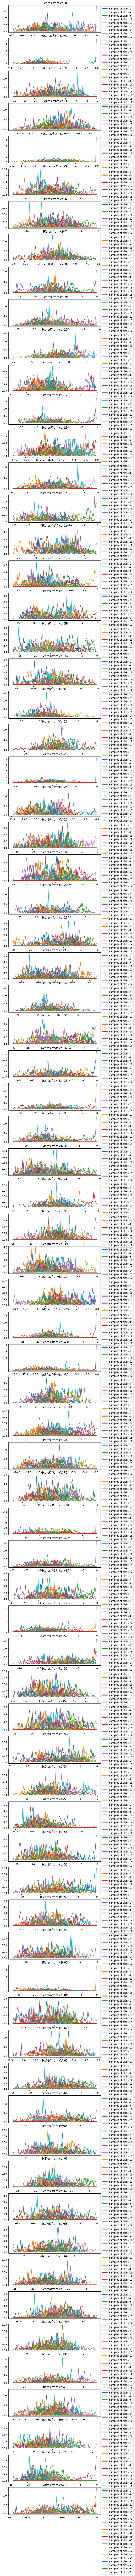

In [2]:
logits = pd.read_csv('../outputs/adaptation/llama3.2-1b/lora_fs/banking77_4928_0.3_0/test=banking77/list=test_1000/logits.csv', index_col=0, header=0).values.astype(float)
logits = log_softmax(logits, axis=1)
labels = pd.read_csv('../outputs/adaptation/llama3.2-1b/lora_fs/banking77_4928_0.3_0/test=banking77/list=test_1000/labels.csv', index_col=0, header=0).values.flatten().astype(int)
plot_hists(labels, logits, group_by='score')

In [7]:
priors = np.bincount(labels) / len(labels)
-logits[np.arange(len(labels)), labels].mean() / -np.log(priors[labels]).mean()
priors = np.ones(77) / 77
-np.log(priors[labels]).mean()
(logits.argmax(axis=1) == labels).mean()

0.5035035035035035

array([<Axes: title={'center': 'Scores from col 0'}>,
       <Axes: title={'center': 'Scores from col 1'}>], dtype=object)

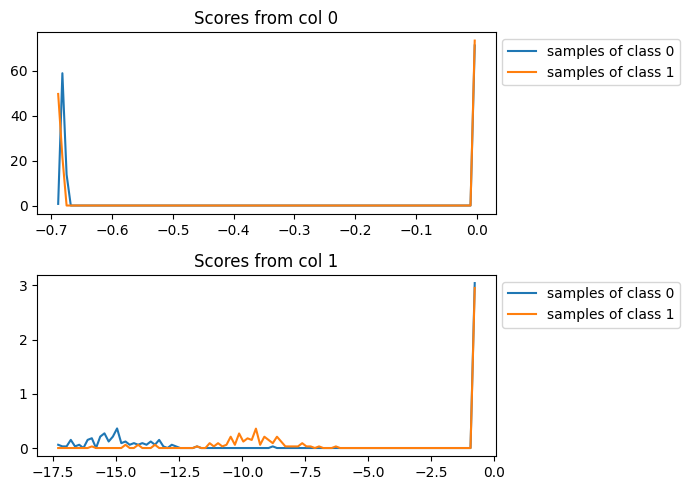

In [36]:
logits = pd.read_csv('../outputs/adaptation/llama3.2-1b/lora_norm-5_plus_dp_cal/sst2_1024_0.3_1/test=sst2/list=test_400/logits.csv', index_col=0, header=0).values.astype(float)
# logits = log_softmax(logits, axis=1)
labels = pd.read_csv('../outputs/adaptation/llama3.2-1b/lora_norm-5_plus_dp_cal/sst2_1024_0.3_1/test=sst2/list=test_400/labels.csv', index_col=0, header=0).values.flatten().astype(int)
plot_hists(labels, logits, group_by='score')

In [37]:
-logits[np.arange(len(labels)), labels].mean()

2.839874681824766